In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
gangtok_meteo = pd.read_csv('/kaggle/input/sikkim-aqi/Sikkim/Metrological Data/Gangtok.csv', delimiter=',')
gangtok_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,3.4,83,0.0,835.3,3.8,5.6,17,320
1,2024-01-01T01:00,2.4,84,0.0,835.8,5.8,6.9,360,317
2,2024-01-01T02:00,6.8,78,0.0,838.5,2.9,6.4,353,297
3,2024-01-01T03:00,9.5,76,0.0,840.8,4.6,6.4,315,308
4,2024-01-01T04:00,11.5,67,0.0,842.2,4.2,5.4,301,307
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,4.8,60,0.0,835.5,2.7,4.5,28,320
8780,2024-12-31T20:00,4.2,53,0.0,834.3,2.7,4.8,32,318
8781,2024-12-31T21:00,3.8,47,0.0,833.3,2.7,4.9,28,309
8782,2024-12-31T22:00,3.8,42,0.0,833.1,2.8,3.7,27,313


In [3]:
gangtok_pollutants = pd.read_csv('/kaggle/input/sikkim-aqi/Sikkim/Pollutants/Gangtok.csv', delimiter= ',')
gangtok_pollutants['Timestamp'] = gangtok_meteo['time']
gangtok_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gangtok_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,11.46,24.08,1.86,3.90,6.13,2.88,42.01,0.44,28.01,...,0.21,9.05,89.08,0.41,105.31,0.0,0.0,0.0,NaN,NaN
1,2024-01-01T01:00,10.92,24.96,2.13,4.03,6.65,3.00,41.63,0.45,25.69,...,0.22,8.55,90.92,0.54,103.57,0.0,0.0,0.0,NaN,NaN
2,2024-01-01T02:00,11.38,24.62,2.48,4.39,7.43,2.90,41.33,0.39,24.92,...,0.19,8.91,90.44,0.43,121.73,0.0,0.0,0.0,NaN,NaN
3,2024-01-01T03:00,9.80,20.16,2.15,3.31,6.01,3.00,40.92,0.35,25.43,...,0.16,9.50,88.30,0.33,132.90,0.0,0.0,0.0,NaN,NaN
4,2024-01-01T04:00,13.42,19.41,2.05,1.09,3.78,3.00,40.52,0.32,28.40,...,0.15,9.18,88.92,0.43,131.58,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,43.00,56.20,2.16,7.15,9.50,2.98,0.28,0.40,12.43,...,0.18,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
8780,2024-12-31T20:00,41.99,46.52,2.01,6.24,8.48,3.00,0.29,0.40,12.00,...,0.19,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
8781,2024-12-31T21:00,53.34,62.31,2.33,6.44,9.12,3.04,0.28,0.44,11.68,...,0.22,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
8782,2024-12-31T22:00,56.40,65.84,1.89,3.10,5.44,2.97,0.28,0.40,13.07,...,0.19,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [4]:
gangtok = pd.merge(gangtok_meteo.iloc[:, :], gangtok_pollutants.iloc[:, 0:3], on='time')
gangtok

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,3.4,83,0.0,835.3,3.8,5.6,17,320,11.46,24.08
1,2024-01-01T01:00,2.4,84,0.0,835.8,5.8,6.9,360,317,10.92,24.96
2,2024-01-01T02:00,6.8,78,0.0,838.5,2.9,6.4,353,297,11.38,24.62
3,2024-01-01T03:00,9.5,76,0.0,840.8,4.6,6.4,315,308,9.80,20.16
4,2024-01-01T04:00,11.5,67,0.0,842.2,4.2,5.4,301,307,13.42,19.41
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,4.8,60,0.0,835.5,2.7,4.5,28,320,43.00,56.20
8780,2024-12-31T20:00,4.2,53,0.0,834.3,2.7,4.8,32,318,41.99,46.52
8781,2024-12-31T21:00,3.8,47,0.0,833.3,2.7,4.9,28,309,53.34,62.31
8782,2024-12-31T22:00,3.8,42,0.0,833.1,2.8,3.7,27,313,56.40,65.84


In [5]:
gangtok['city'] = 'Gangtok'
gangtok

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,3.4,83,0.0,835.3,3.8,5.6,17,320,11.46,24.08,Gangtok
1,2024-01-01T01:00,2.4,84,0.0,835.8,5.8,6.9,360,317,10.92,24.96,Gangtok
2,2024-01-01T02:00,6.8,78,0.0,838.5,2.9,6.4,353,297,11.38,24.62,Gangtok
3,2024-01-01T03:00,9.5,76,0.0,840.8,4.6,6.4,315,308,9.80,20.16,Gangtok
4,2024-01-01T04:00,11.5,67,0.0,842.2,4.2,5.4,301,307,13.42,19.41,Gangtok
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,4.8,60,0.0,835.5,2.7,4.5,28,320,43.00,56.20,Gangtok
8780,2024-12-31T20:00,4.2,53,0.0,834.3,2.7,4.8,32,318,41.99,46.52,Gangtok
8781,2024-12-31T21:00,3.8,47,0.0,833.3,2.7,4.9,28,309,53.34,62.31,Gangtok
8782,2024-12-31T22:00,3.8,42,0.0,833.1,2.8,3.7,27,313,56.40,65.84,Gangtok


In [6]:
gangtok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5352 non-null   float64
 10  PM10 (µg/m³)              6234 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
gangtok = gangtok.interpolate()
gangtok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    gangtok[delay1_col] = gangtok[col].shift(1)
    delay2_col = col + "_delay2"
    gangtok[delay2_col] = gangtok[col].shift(2)
    gangtok.loc[0, delay1_col] = gangtok[col].iloc[-1]
    gangtok.loc[1, delay2_col] = gangtok[col].iloc[-1]
    gangtok.loc[0, delay2_col] = gangtok[col].iloc[-2]

gangtok

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,3.4,83,0.0,835.3,3.8,5.6,17,320,11.46,24.08,Gangtok,50.39,56.40,53.25,65.84
1,2024-01-01T01:00,2.4,84,0.0,835.8,5.8,6.9,360,317,10.92,24.96,Gangtok,11.46,50.39,24.08,53.25
2,2024-01-01T02:00,6.8,78,0.0,838.5,2.9,6.4,353,297,11.38,24.62,Gangtok,10.92,11.46,24.96,24.08
3,2024-01-01T03:00,9.5,76,0.0,840.8,4.6,6.4,315,308,9.80,20.16,Gangtok,11.38,10.92,24.62,24.96
4,2024-01-01T04:00,11.5,67,0.0,842.2,4.2,5.4,301,307,13.42,19.41,Gangtok,9.80,11.38,20.16,24.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,4.8,60,0.0,835.5,2.7,4.5,28,320,43.00,56.20,Gangtok,35.20,29.08,60.58,36.16
8780,2024-12-31T20:00,4.2,53,0.0,834.3,2.7,4.8,32,318,41.99,46.52,Gangtok,43.00,35.20,56.20,60.58
8781,2024-12-31T21:00,3.8,47,0.0,833.3,2.7,4.9,28,309,53.34,62.31,Gangtok,41.99,43.00,46.52,56.20
8782,2024-12-31T22:00,3.8,42,0.0,833.1,2.8,3.7,27,313,56.40,65.84,Gangtok,53.34,41.99,62.31,46.52


In [9]:
sikkim_data = gangtok
sikkim_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,3.4,83,0.0,835.3,3.8,5.6,17,320,11.46,24.08,Gangtok,50.39,56.40,53.25,65.84
1,2024-01-01T01:00,2.4,84,0.0,835.8,5.8,6.9,360,317,10.92,24.96,Gangtok,11.46,50.39,24.08,53.25
2,2024-01-01T02:00,6.8,78,0.0,838.5,2.9,6.4,353,297,11.38,24.62,Gangtok,10.92,11.46,24.96,24.08
3,2024-01-01T03:00,9.5,76,0.0,840.8,4.6,6.4,315,308,9.80,20.16,Gangtok,11.38,10.92,24.62,24.96
4,2024-01-01T04:00,11.5,67,0.0,842.2,4.2,5.4,301,307,13.42,19.41,Gangtok,9.80,11.38,20.16,24.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,4.8,60,0.0,835.5,2.7,4.5,28,320,43.00,56.20,Gangtok,35.20,29.08,60.58,36.16
8780,2024-12-31T20:00,4.2,53,0.0,834.3,2.7,4.8,32,318,41.99,46.52,Gangtok,43.00,35.20,56.20,60.58
8781,2024-12-31T21:00,3.8,47,0.0,833.3,2.7,4.9,28,309,53.34,62.31,Gangtok,41.99,43.00,46.52,56.20
8782,2024-12-31T22:00,3.8,42,0.0,833.1,2.8,3.7,27,313,56.40,65.84,Gangtok,53.34,41.99,62.31,46.52


In [10]:
sikkim_data['city'] = sikkim_data['city'].astype('category')

In [11]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [12]:
X, y = sikkim_data[input_cols], sikkim_data[target_cols]

In [13]:
from xgboost import XGBRegressor

In [14]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [15]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_check = model.predict(X)

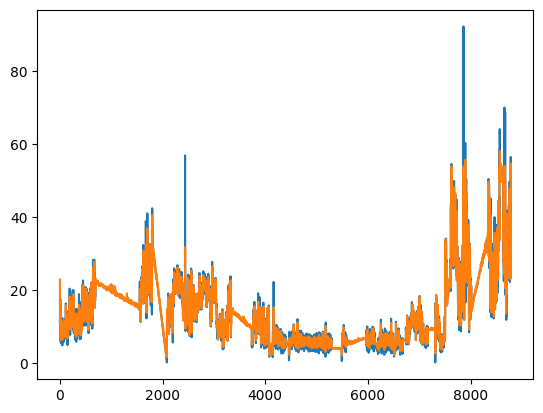

In [17]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9708683484655695


In [19]:
import joblib
joblib.dump(model, 'Sikkim_PM2.5_µgm³.pkl')

['Sikkim_PM2.5_µgm³.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9631282635729045


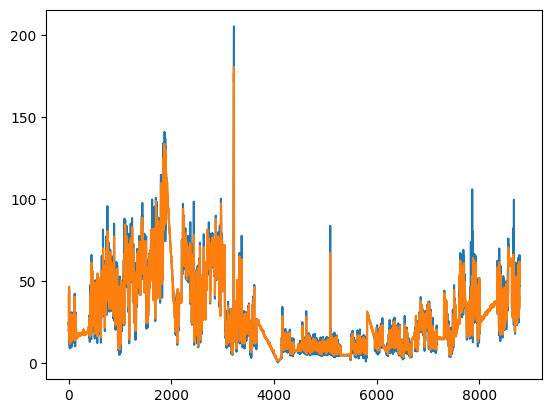

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Sikkim_PM10_µgm³.pkl')

['Sikkim_PM10_µgm³.pkl']